<a href="https://colab.research.google.com/github/hgbrian/ipynb_experiments/blob/master/ngs_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
sheet_id = "1GMMfhyLK0-q8XkIo3YxlWaZA5vVMuhU1kg41g4xLkXc"

In [0]:
!pip install --upgrade -q gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
sheet = gc.open_by_key(sheet_id)

In [0]:
import pandas as pd
rows = sheet.worksheet("T").get_all_values()
df = pd.DataFrame.from_records([r[:10] for r in rows if r[3] != ''])

In [0]:
import re
dfr = df.rename(columns=df.iloc[0]).drop(index=0).rename(columns={"Rate: (Gb/d) ":"Rate: (Gb/d)"}).set_index("Platform")["Rate: (Gb/d)"]
dfr = dfr[(dfr != "--") & (dfr != "TBC")]
for n, val in enumerate(dfr):
  if "-" in val:
    rg = re.search("(\d+).(\d+)", val).groups()
    val = (float(rg[0]) + float(rg[1])) / 2
    dfr[n] = val
dfr = pd.DataFrame(dfr.astype(float)).reset_index()

In [0]:
dfr_x = pd.concat([dfr, 
                   pd.DataFrame.from_records([{"Platform":"ABI 3730xl", "Rate: (Gb/d)":.001}, {"Platform": "ABI SeqStudio", "Rate: (Gb/d)":.0001}])])

dfr_x["Rate: (Mb/d)"] = dfr_x["Rate: (Gb/d)"] * 1000

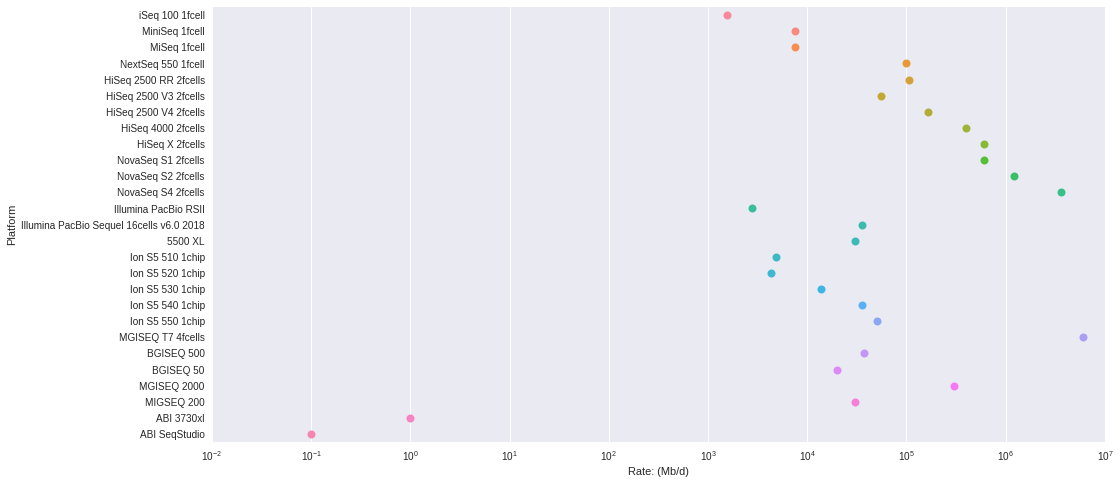

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(16,8))
fax = sns.stripplot(data=dfr_x, y="Platform", x="Rate: (Mb/d)", size=8, ax=ax);
fax.set(xscale="log");
fax.set(xlim=(.01, None));